<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_16_Matplotlib Advanced Customization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Job Postings Trend for Cloud Engineers (2.16.1)

C:\Users\mumbo\AppData\Local\Temp\ipykernel_10900\372519001.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cloud_df = cloud_df.pivot_table(index='posted_month', values='job_title_short', aggfunc='count')


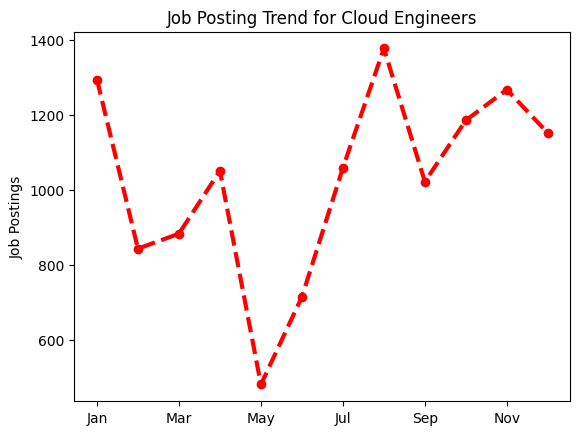

In [27]:
cloud_df = df.copy()

cloud_df = cloud_df[cloud_df['job_title_short'] == 'Cloud Engineer']

cloud_df['posted_month'] = cloud_df['job_posted_date'].dt.strftime('%b')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cloud_df['posted_month'] = pd.Categorical(cloud_df['posted_month'], categories=month_order, ordered=True)

cloud_df = cloud_df.pivot_table(index='posted_month', values='job_title_short', aggfunc='count')

cloud_df.plot(
  kind='line',
  linewidth=3,
  linestyle='--',
  marker='o',
  color='r'
  )

plt.title('Job Posting Trend for Cloud Engineers')
plt.xlabel('')
plt.ylabel('Job Postings')
plt.legend().remove()
plt.show()

---

## 🟨 Customize Bar Chart (2.16.2)

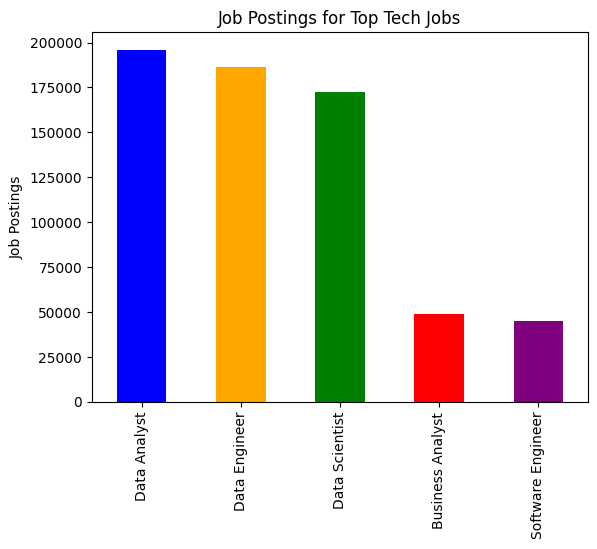

In [28]:
# Code Needed
colors = ['blue', 'orange', 'green', 'red', 'purple']

job_count_df = df.copy()

job_count_df = job_count_df['job_title_short'].value_counts().head()

job_count_df.plot(
  kind='bar',
  color=colors
  )

plt.title('Job Postings for Top Tech Jobs')
plt.xlabel('')
plt.ylabel('Job Postings')
plt.legend().remove()
plt.show()